# Importing 


In [1]:
from scipy import constants
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def model_evaluation(model, xs):
    return np.array(list(map(model, xs)))

# Mathematical Model 

Using proportortional Controller for closed loop model

In [3]:
# Mass of the car, kg
m = 700

#Thrust Parameter , (N / %Pedal)
F_pedal = 30

#Density of Air, kg/m^3 
Rho = 1.225

#Cross-sectional Area of Car , m^2
Ar = 5

#Drag Coefficient
Cd = 0.24

# Controller gain
K_c = 13.037
#K_c = 20.



In [4]:
def model_vehicle (V, t, st_func , dis_func):
    
    
    V_sp = st_func(t)
    theta = dis_func(t)
    
    
    drive = F_pedal * K_c * (V_sp - V)
    drag = 0.5 * Rho * Ar * Cd * (V**2)
    slope = constants.g * np.sin(theta)
    return (1. / m) * (drive - drag) - slope 
    
    
    


In [5]:
t = np.linspace(0, 200, 100)

In [6]:
t

array([  0.        ,   2.02020202,   4.04040404,   6.06060606,
         8.08080808,  10.1010101 ,  12.12121212,  14.14141414,
        16.16161616,  18.18181818,  20.2020202 ,  22.22222222,
        24.24242424,  26.26262626,  28.28282828,  30.3030303 ,
        32.32323232,  34.34343434,  36.36363636,  38.38383838,
        40.4040404 ,  42.42424242,  44.44444444,  46.46464646,
        48.48484848,  50.50505051,  52.52525253,  54.54545455,
        56.56565657,  58.58585859,  60.60606061,  62.62626263,
        64.64646465,  66.66666667,  68.68686869,  70.70707071,
        72.72727273,  74.74747475,  76.76767677,  78.78787879,
        80.80808081,  82.82828283,  84.84848485,  86.86868687,
        88.88888889,  90.90909091,  92.92929293,  94.94949495,
        96.96969697,  98.98989899, 101.01010101, 103.03030303,
       105.05050505, 107.07070707, 109.09090909, 111.11111111,
       113.13131313, 115.15151515, 117.17171717, 119.19191919,
       121.21212121, 123.23232323, 125.25252525, 127.27

In [7]:
def t_func(t):
        
    if t < 20:
        return 0
        
    if t >= 20 and t < 100:
        return 15
        
    if t >= 100 and t < 150:
        return 20
    
    if t >= 150:
        return 10
    
    
def slope_func(t):
        
#     if t < 20:
    return 0
        
         
#     if t >= 20 and t < 100:
#         return 1.5
        
#     if t >= 100 and t < 150:
#         return 2.0
    
#     if t >= 150:
#         return 3.0
        
def slope_func1(t):
        
    if t < 20:
        return 0
        
         
    if t >= 20 and t < 100:
         return 3.0
        
    if t >= 100 and t < 150:
        return 4.0
    
    if t >= 150:
        return 6.0
    
    
def slope_func2(t):
        
    if t < 20:
        return 0
        
         
    if t >= 20 and t < 100:
        return 1.875
        
    if t >= 100 and t < 150:
        return 2.5
    
    if t >= 150:
         return 3.75

     
    

# Simulation

In [8]:
initial = 0
v_sim = [initial, ]

for i in range(len(t) - 1):
    t_pair = t[i:i+2]
    t_now, t_next = t_pair
    step_sim = odeint(model_vehicle, initial, t_pair, args=(t_func, slope_func))
    v_last = step_sim.reshape(-1)[-1]
    v_sim.append(v_last)
    initial = v_last 
    #step_sim1 = odeint(model_vehicle, initial, t[i:i+2], args=(t_func, slope_func1))
    #step_sim2 = odeint(model_vehicle, initial, t[i:i+2], args=(t_func, slope_func2))
    
         # take the last value
    

    # appendt it to the resulting list
    
    
    # save it as initial condition for the next run
     
    
v_sim = np.array(v_sim).reshape(-1)
#v_sim1= np.array(v_sim).reshape(-1)
#v_sim2= np.array(v_sim).reshape(-1)
 

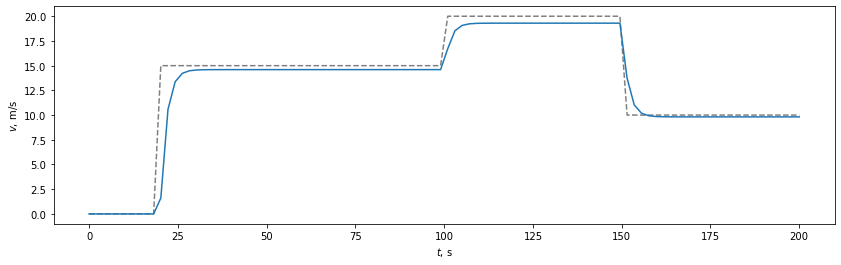

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(t, model_evaluation(t_func, t), '--', color= 'gray')
plt.plot(t, v_sim)

plt.xlabel('$t$, s')
plt.ylabel('$v$, m/s')
plt.show()

In [10]:
v_sim

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.60087694, 10.58296573, 13.37226835, 14.22579803, 14.48579894,
       14.56489061, 14.58894017, 14.59625197, 14.59847491, 14.59915065,
       14.59935612, 14.59941857, 14.59943762, 14.5994434 , 14.59944513,
       14.59944565, 14.5994459 , 14.59944592, 14.5994459 , 14.59944592,
       14.5994459 , 14.59944592, 14.5994459 , 14.59944592, 14.5994459 ,
       14.59944592, 14.5994459 , 14.59944592, 14.5994459 , 14.59944592,
       14.59944591, 14.59944592, 14.59944591, 14.59944592, 14.59944591,
       14.59944592, 14.59944591, 14.59944592, 14.59944591, 14.59944592,
       16.72431068, 18.52996986, 19.07029918, 19.23152172, 19.27958558,
       19.29391078, 19.29817995, 19.29945224, 19.29983143, 19.29994443,
       19.29997815, 19.29998824, 19.29999122, 19.29999211, 19.29999246,
       19.2999925 , 19.29999247, 19.2999925 , 19.29999248, 19.29

In [11]:
error = model_evaluation(t_func, t) - v_sim

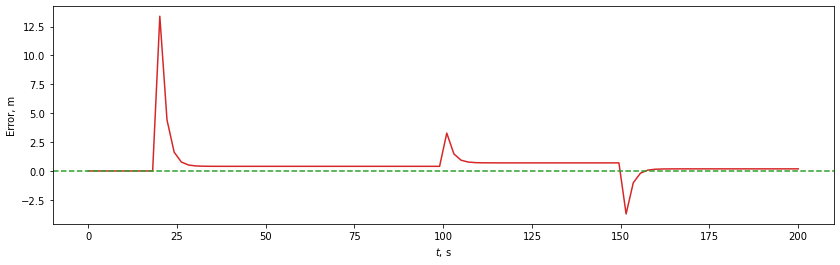

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(t, error, color='tab:red')
plt.axhline(0, linestyle='--', color='tab:green')
plt.xlabel('$t$, s')
plt.ylabel('Error, m')
plt.show()

In [13]:
sse = np.sum(np.square(error))

print('Sum of squared errors during simulation: {:.3f}'.format(sse))

Sum of squared errors during simulation: 248.500
